## Import Libraries

In [1]:
from keras.models import load_model
from PIL import Image
import numpy as np
import cv2

%matplotlib inline 
from matplotlib import pyplot as plt 
import pylab 
pylab.rcParams['figure.figsize'] = (10.0, 8.0)


## Tải mô hình đã được huấn luyện sẵn

In [3]:
export_dir='D:/HUS_22001541/PPNCKH/Emotions_Recognition/output/emotion_model_pretrained.h5'
emotion_model = load_model(export_dir)

# summarize model.
emotion_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                             

In [4]:
emotion_ranges= ['positive','negative','neutral']

## Ảnh Test

In [8]:
# img_path = "./1.4_test_input/images/priyanka_chopra.jpg"
img_path = "D:/HUS_22001541/PPNCKH/Emotions_Recognition/input/test_images/positive_img_02.jpg"

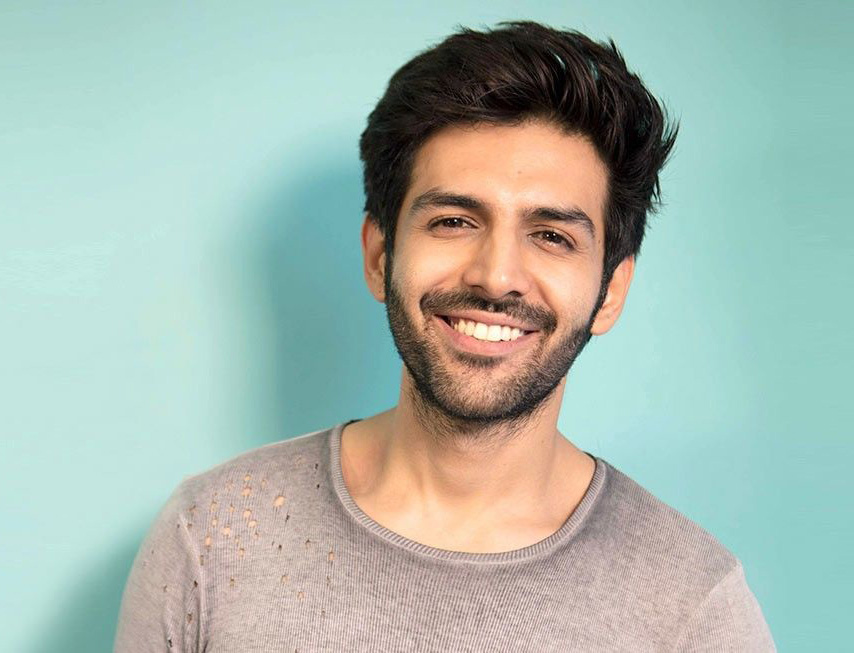

In [9]:
from IPython.display import Image 
pil_img = Image(filename=img_path)
display(pil_img)

## Kết quả

1/1 [==============================] - 7s 7s/step
1: positive


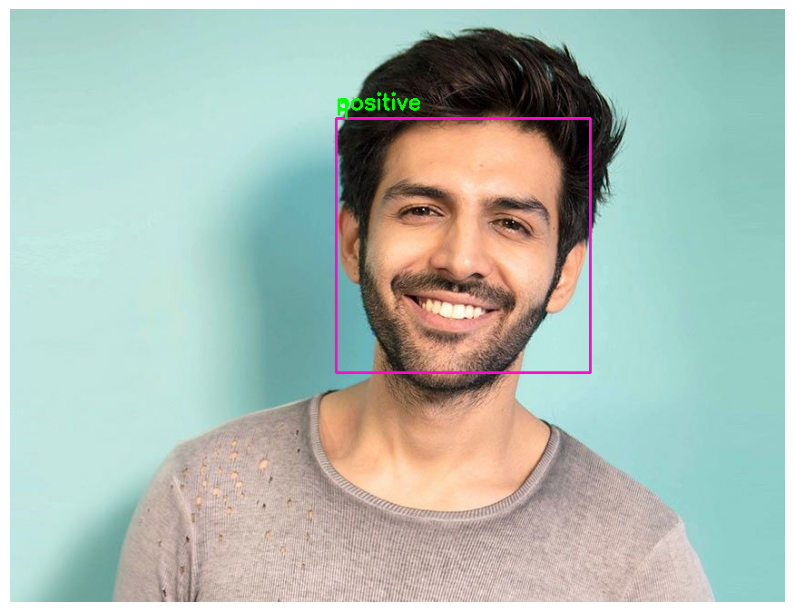

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh và chuyển sang ảnh xám
test_image = cv2.imread(img_path)
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Load bộ nhận diện khuôn mặt
face_cascade = cv2.CascadeClassifier('D:/HUS_22001541/PPNCKH/Emotions_Recognition/input/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

i = 0
for (x, y, w, h) in faces:
    i += 1
    cv2.rectangle(test_image, (x, y), (x + w, y + h), (203, 12, 255), 2)

    # Cắt vùng khuôn mặt
    img_gray = gray[y:y + h, x:x + w]

    # Resize ảnh về 48x48 để phù hợp với mô hình nhận diện cảm xúc
    emotion_img = cv2.resize(img_gray, (48, 48), interpolation=cv2.INTER_AREA)
    emotion_image_array = np.array(emotion_img)
    emotion_input = np.expand_dims(emotion_image_array, axis=0)

    # Dự đoán biểu cảm
    output_emotion = emotion_ranges[np.argmax(emotion_model.predict(emotion_input))]

    # Hiển thị kết quả dự đoán
    output_str = f"{i}: {output_emotion}"
    print(output_str)

    # Màu chữ (xanh lá cây)
    col = (0, 255, 0)

    # Vẽ số thứ tự lên ảnh
    cv2.putText(test_image, str(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, col, 2)

    # Vẽ tên cảm xúc ngay phía trên hình chữ nhật khuôn mặt
    cv2.putText(test_image, output_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, col, 2)

# Hiển thị ảnh kết quả
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
